In [2]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt

In [3]:
### initialize the parameters of the fake dataset
data_N = 100 # number of data points
data_min = 0. # minimum x value
data_max = 4. # maximum x value
data_sigma = 0.5 # uncertainty in y (currently constant, but code could be modified for variable uncs)
true_m1 = 2. # the true slope of the first line
true_m2 = -2. # the true slope of the second line
true_b1 = 0. # the y-intercept of the first line
true_break = 2. # the x value of the breakpoint between the piecewise lines

### now we define a model for the first fitting method
def piecewise_pyramid(x,m1=true_m1,m2=true_m2,b1=true_b1, pbreak=true_break):
    y = np.copy(x)
    y[np.where(x<pbreak)] = x[np.where(x<pbreak)]*m1+b1
    y[np.where(x>=pbreak)] = x[np.where(x>=pbreak)]*m2 + (m1-m2)*pbreak + b1
    return y

### make an array for the x data
x = np.linspace(data_min,data_max,data_N)

### use x data to generate noise-less y data
y_clean = piecewise_pyramid(x)

### come up with some gaussian noise 
noise = np.random.normal(0,data_sigma,data_N)

### synthesize dirty y data
y = y_clean+noise

Text(0, 0.5, '$y$')

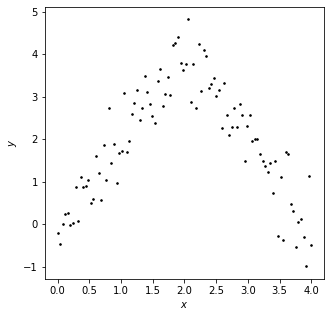

In [12]:
### simple visualization of the data
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x,y,color='k',marker='.',s=10)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [10]:
### Method one: this follows the examples we've been doing, but doesn't work for confidence intervals\
### Since method 2 works, I'm just going to comment this out for now. 

# def residual(params, data, x):
#     p_m1 = params['m1']
#     p_m2 = params['m2']
#     p_b1 = params['b1']
#     p_x0 = params['x0']
#     model = np.zeros(len(x))   
#     model[np.where(x<p_x0)] = x[np.where(x<p_x0)]*p_m1+p_b1
#     model[np.where(x>=p_x0)] = x[np.where(x>=p_x0)]*p_m2 + (p_m1-p_m2)*p_x0 + p_b1
#     return model - data 

# params = lmfit.Parameters()
# params.add('m1', value=1.5)
# params.add('m2', value=-1.5)
# params.add('b1', value=0.2)
# params.add('x0', value=2.5)

# mini = lmfit.Minimizer(residual, params,args=(y,x))
# out = lmfit.minimize(residual, params,args=(y,x))
# lmfit.report_fit(out.params)
# #ci = lmfit.conf_interval(mini, out, verbose=True)

# fit_x0 = out.params['x0'].value
# fit_m1 = out.params['m1'].value
# fit_m2 = out.params['m2'].value
# fit_b1 = out.params['b1'].value
# fit_b2 = (fit_m1-fit_m2)*fit_x0 + fit_b1

# max_m1, min_m1 = fit_m1+out.params['m1'].stderr, fit_m1-out.params['m1'].stderr
# max_m2, min_m2 = fit_m2+out.params['m2'].stderr, fit_m2-out.params['m2'].stderr
# max_b1, min_b1 = fit_b1+out.params['b1'].stderr, fit_b1-out.params['b1'].stderr
# max_b2, min_b2 = (max_m1-max_m2)*fit_x0 + max_b1, (min_m1-min_m2)*fit_x0 + min_b1


In [18]:
### Method two, this one seems simpler and works just as well (including confidence interval!)

model_obj = lmfit.Model(piecewise_pyramid)
result = model_obj.fit(y,x=x,m1=1.5,m2=-1.5,b1=2.5,x0=2.5)
uncs = result.eval_uncertainty(sigma=3)

### grab all the mean value results for fit parameters
fit_x0 = result.params['pbreak'].value
fit_m1 = result.params['m1'].value
fit_m2 = result.params['m2'].value
fit_b1 = result.params['b1'].value
### we didn't fit for the y intercept of line 2, so we have to calculate it from the other parameters
fit_b2 = (fit_m1-fit_m2)*fit_x0 + fit_b1


print(result.fit_report())

### calculate confidence intervals
ci = result.conf_interval()

/Users/hph/anaconda3/envs/pdf_env/lib/python3.9/site-packages/lmfit/model.py:990: UserWarning: The keyword argument x0 does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


[[Model]]
    Model(piecewise_pyramid)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 100
    # variables        = 4
    chi-square         = 26.2160197
    reduced chi-square = 0.27308354
    Akaike info crit   = -125.879952
    Bayesian info crit = -115.459272
[[Variables]]
    m1:      2.11688165 +/- 0.12303872 (5.81%) (init = 1.5)
    m2:     -2.21174332 +/- 0.13065015 (5.91%) (init = -1.5)
    b1:     -0.16162586 +/- 0.14422372 (89.23%) (init = 2.5)
    pbreak:  2.02875700 +/- 0.04832612 (2.38%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(m1, b1)     = -0.862
    C(m2, pbreak) = -0.626
    C(m1, pbreak) = -0.599
    C(b1, pbreak) = 0.339


In [19]:
### print the confidence intervals for fit parameters (not currently used for anything)
lmfit.printfuncs.report_ci(ci)

           99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 m1    :  -0.36104  -0.23617  -0.12370   2.11688  +0.14736  +0.29932  +0.45651
 m2    :  -0.40308  -0.25414  -0.13134  -2.21174  +0.14872  +0.29220  +0.42936
 b1    :  -0.47434  -0.30837  -0.15893  -0.16163  +0.14498  +0.29210  +0.43939
 pbreak:  -0.18182  -0.13055  -0.06920   2.02876  +0.04260  +0.09120  +0.16017


Text(0, 0.5, '$y$')

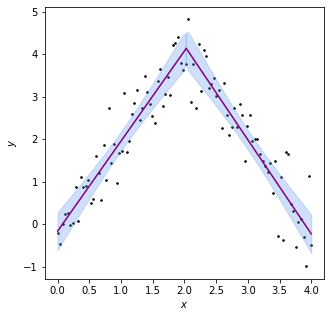

In [31]:
### visualize the data with the fit line and 3-sigma confidence intervals for the mean y values!
fig,ax = plt.subplots(figsize=(5,5))
x_arr = np.linspace(data_min,data_max,1000)
ax.scatter(x,y,color='k',marker='.',s=10)
ax.plot(x_arr[np.where(x_arr<fit_x0)],x_arr[np.where(x_arr<fit_x0)]*fit_m1 + fit_b1,color='purple')
ax.plot(x_arr[np.where(x_arr>=fit_x0)],x_arr[np.where(x_arr>=fit_x0)]*fit_m2 + fit_b2,color='purple')
scooch=-0.0087
ax.fill_between(x[np.where(x<fit_x0)],
                y1 = x[np.where(x<fit_x0)]*fit_m1 + fit_b1 -uncs[np.where(x<fit_x0)], 
                y2=x[np.where(x<fit_x0)]*fit_m1 + fit_b1+uncs[np.where(x<fit_x0)],
                color='cornflowerblue',alpha=0.3)
ax.fill_between(x[np.where(x>fit_x0+scooch)],
                y1 = x[np.where(x>fit_x0+scooch)]*fit_m2 + fit_b2 -uncs[np.where(x>fit_x0+scooch)], 
                y2=x[np.where(x>fit_x0+scooch)]*fit_m2 + fit_b2+uncs[np.where(x>fit_x0+scooch)],
                color='cornflowerblue',alpha=0.3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')